## Estadística Aplicada

Actividad 11 - noviembre 3

Oscar Gabriel Martínez Rodríguez 1962702

Grupo 43

In [987]:
## librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [988]:
## Satatsmodels
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf,plot_predict
from statsmodels.tsa.arima.model import  ARIMA
## pmd arima
import pmdarima as pm

In [989]:
import warnings

warnings.filterwarnings("ignore")

### ¿Qué datos se utilizarán?

Se hará el análisis con el periodo correspondiente de 2013 a 2023, precisamente agosto 2013 a julio 2023.

Se hará aun así un análisis de 3 años, el cual tras analizar y encontrar el modelo ARIMA que mejor se ajusta, la "predicción" es solamente el número obtenido para julio 2023.  Esto puede ser posible a que los datos trabajados no son lo suficientemente grandes para poder estimar un modelo ARIMA, por lo que después de este análisis comienza el hecho para 10 años, esperando obtener un modelo que pueda evitar este problema en que la predicción sea simplemente el resultado anterior estudiado.

In [990]:
data_3 = pd.read_csv('imcp_3.csv')
data_3['Periodos'] = pd.to_datetime(data_3['Periodos'], format='%Y/%m')
data_3.set_index('Periodos', inplace=True)
data_3.tail()

,IMCP
Periodos,
2023-03-01,106.762443
2023-04-01,107.928291
2023-05-01,107.775653
2023-06-01,108.168118
2023-07-01,108.209387


In [991]:
data_20 = pd.read_csv('imcp_10.csv')
data_20['Periodos'] = pd.to_datetime(data_20['Periodos'], format='%Y/%m')
data_20.set_index('Periodos', inplace=True)
data_20.tail()

,IMCP
Periodos,
2023-03-01,106.762443
2023-04-01,107.928291
2023-05-01,107.775653
2023-06-01,108.168118
2023-07-01,108.209387


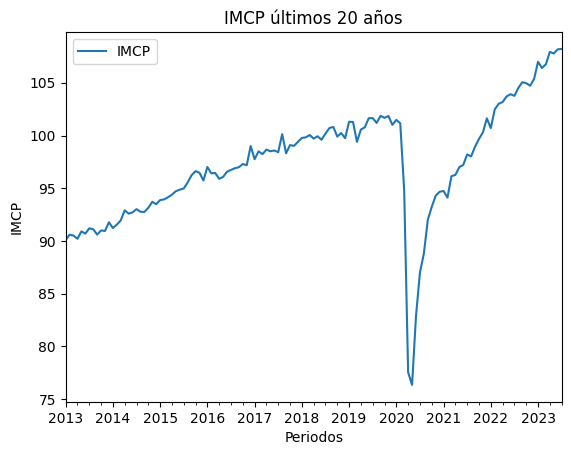

In [992]:
data_20.plot()
plt.title('IMCP últimos 20 años')
plt.ylabel('IMCP')
plt.show()

Aquí es más evidente el bajón que generó la pandemia en el IMCP, para después seguir en un crecimiento gradual, que ha mantenido pese a repentinos picos, hasta el día de hoy.

In [993]:
data_3.dtypes

IMCP    float64
dtype: object

In [994]:
data_3.isnull().sum()

IMCP    0
dtype: int64

In [995]:
data_3 = data_3[7:]
data_3.head(5)

,IMCP
Periodos,
2020-08-01,88.808249
2020-09-01,92.012059
2020-10-01,93.233251
2020-11-01,94.296474
2020-12-01,94.662205


In [996]:
data_3.tail()

,IMCP
Periodos,
2023-03-01,106.762443
2023-04-01,107.928291
2023-05-01,107.775653
2023-06-01,108.168118
2023-07-01,108.209387


In [997]:
data_3 = data_3.asfreq('MS')
data_3.index

DatetimeIndex(['2020-08-01', '2020-09-01', '2020-10-01', '2020-11-01',
               '2020-12-01', '2021-01-01', '2021-02-01', '2021-03-01',
               '2021-04-01', '2021-05-01', '2021-06-01', '2021-07-01',
               '2021-08-01', '2021-09-01', '2021-10-01', '2021-11-01',
               '2021-12-01', '2022-01-01', '2022-02-01', '2022-03-01',
               '2022-04-01', '2022-05-01', '2022-06-01', '2022-07-01',
               '2022-08-01', '2022-09-01', '2022-10-01', '2022-11-01',
               '2022-12-01', '2023-01-01', '2023-02-01', '2023-03-01',
               '2023-04-01', '2023-05-01', '2023-06-01', '2023-07-01'],
              dtype='datetime64[ns]', name='Periodos', freq='MS')

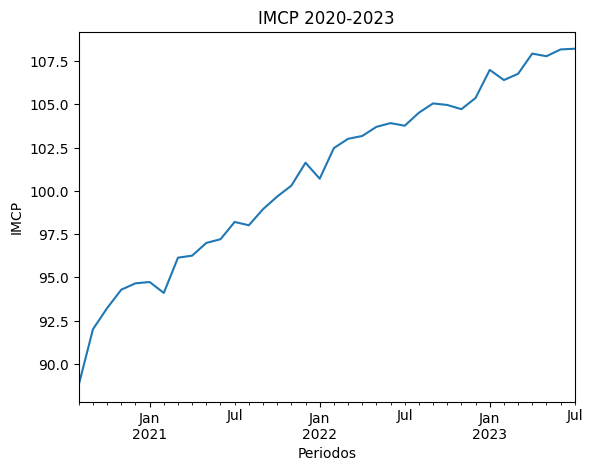

In [998]:
# graficar
data_3['IMCP'].plot()
plt.title('IMCP 2020-2023')
plt.ylabel('IMCP')
plt.show()

In [999]:
## prueba de raíz unitaria
prueba_adf = adfuller(data_3['IMCP'])
pvalue = prueba_adf[1]
pvalue.round(2)

0.48

No se rechaza H0, por lo que la serie es no estacionaria.

In [1000]:
data_3['1ra_diff'] = data_3['IMCP'].diff()

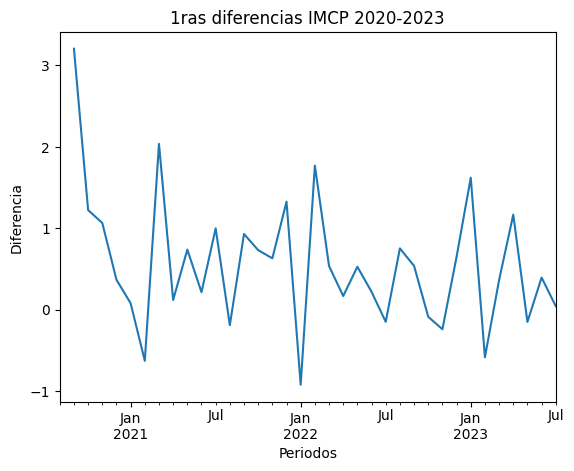

In [1001]:
data_3['1ra_diff'].plot()
plt.title('1ras diferencias IMCP 2020-2023')
plt.ylabel('Diferencia')
plt.show()

In [1002]:
data_3.tail()

,IMCP,1ra_diff
Periodos,,
2023-03-01,106.762443,0.361856
2023-04-01,107.928291,1.165848
2023-05-01,107.775653,-0.152638
2023-06-01,108.168118,0.392465
2023-07-01,108.209387,0.041269


In [1003]:
prueba_adf1 = adfuller(data_3['1ra_diff'].dropna())
pvalue1 = prueba_adf1[1]
pvalue1.round(2)

0.0

Se rechaza H0, las primeras diferencias del IMCP son un proceso estacionario

* IMCP 2020-2023 integrado I(1)
* 1ras diferencias integrado I(0)

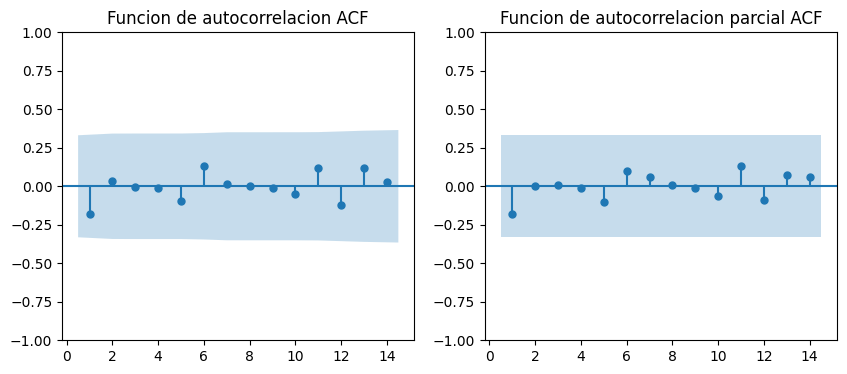

In [1004]:
## correlaciones
ig, ax = plt.subplots(1,2, figsize = (10,4))
##1er subgráfica
plot_acf(data_3['1ra_diff'].dropna(), zero = False,lags=14, ax= ax[0], title = 'Funcion de autocorrelacion ACF')
##2da gráfica
plot_pacf(data_3['1ra_diff'].dropna(), zero=False, lags=14, ax=ax[1], title = 'Funcion de autocorrelacion parcial ACF')
plt.show();

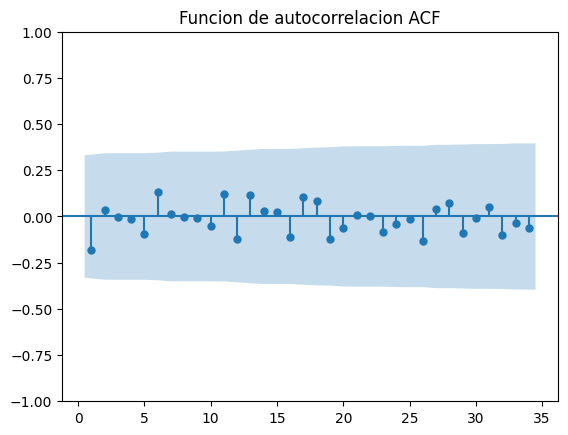

In [1005]:
plot_acf(data_3['1ra_diff'].dropna(), zero = False,lags=34, title = 'Funcion de autocorrelacion ACF')
plt.show()

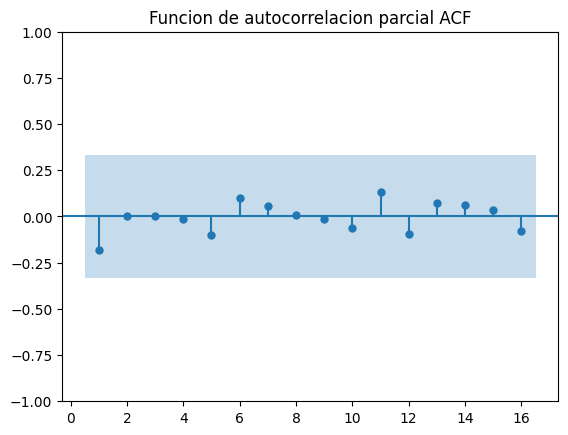

In [1006]:
plot_pacf(data_3['1ra_diff'].dropna(), zero = False,lags=16, title = 'Funcion de autocorrelacion parcial ACF')
plt.show()

No se aprecia algún tipo de patrón que indique esta es una serie estacional.

In [1007]:
# obtener el orden, aic
pm.auto_arima(data_3['IMCP'],
              start_p = 1, start_q = 1,
              max_p = 20, max_q = 20,
              ic = 'aic',
              seasonal = False)

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True)

In [1008]:
# obtener el orden, bic
pm.auto_arima(data_3['IMCP'],
              start_p = 1, start_q = 1,
              max_p = 20, max_q = 20,
              ic = 'aic',
              seasonal = False)

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True)

In [1009]:
# obtener el orden, hqic
pm.auto_arima(data_3['IMCP'],
              start_p = 1, start_q = 1,
              max_p = 20, max_q = 20,
              ic = 'hqic',
              seasonal = False)

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True)

In [1010]:
# obtener el orden, oob
pm.auto_arima(data_3['IMCP'],
              start_p = 1, start_q = 1,
              max_p = 20, max_q = 20,
              ic = 'oob',
              seasonal = False)

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True)

Por los 4 'ic', dan el mismo modelo ARIMA(0,1,0)

In [1011]:
# vamos a estimar varios modelos y  guardar el AIC BIC
ic = {}
for ar in range(7):
    for ma in range(7):
        print(f"AR: {ar}, MA: {ma}")
        modelo = ARIMA(data_3['1ra_diff'].dropna(), order=(ar, 0, ma))
        resultado = modelo.fit()
        ic[(ar, ma)] = [resultado.aic, resultado.bic]
 
ic = pd.DataFrame(ic, index=["AIC", "BIC"]).T
ic.index = ic.index.set_names(["AR", "MA"])

AR: 0, MA: 0
AR: 0, MA: 1
AR: 0, MA: 2
AR: 0, MA: 3
AR: 0, MA: 4
AR: 0, MA: 5
AR: 0, MA: 6
AR: 1, MA: 0
AR: 1, MA: 1
AR: 1, MA: 2
AR: 1, MA: 3
AR: 1, MA: 4
AR: 1, MA: 5
AR: 1, MA: 6
AR: 2, MA: 0
AR: 2, MA: 1
AR: 2, MA: 2
AR: 2, MA: 3
AR: 2, MA: 4
AR: 2, MA: 5
AR: 2, MA: 6
AR: 3, MA: 0
AR: 3, MA: 1
AR: 3, MA: 2
AR: 3, MA: 3
AR: 3, MA: 4
AR: 3, MA: 5
AR: 3, MA: 6
AR: 4, MA: 0
AR: 4, MA: 1
AR: 4, MA: 2
AR: 4, MA: 3
AR: 4, MA: 4
AR: 4, MA: 5
AR: 4, MA: 6
AR: 5, MA: 0
AR: 5, MA: 1
AR: 5, MA: 2
AR: 5, MA: 3
AR: 5, MA: 4
AR: 5, MA: 5
AR: 5, MA: 6
AR: 6, MA: 0
AR: 6, MA: 1
AR: 6, MA: 2
AR: 6, MA: 3
AR: 6, MA: 4
AR: 6, MA: 5
AR: 6, MA: 6


In [1012]:
ic.sort_values('AIC').head(1)

,,AIC,BIC
AR,MA,,
0,0,88.018147,91.128844


In [1013]:
ic.sort_values('BIC').head(1)

,,AIC,BIC
AR,MA,,
0,0,88.018147,91.128844


Tanto auto_arima, como el ciclo para encontrar el mejor ARIMA por AIC y BIC mencionan que el mejor modelo es el ARIMA(0,1,0)

In [1014]:
model = ARIMA(data_3['IMCP'], order = (0,1,0))
results = model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                   IMCP   No. Observations:                   36
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 -48.821
Date:                Mon, 30 Oct 2023   AIC                             99.641
Time:                        22:03:38   BIC                            101.196
Sample:                    08-01-2020   HQIC                           100.178
                         - 07-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.9530      0.166      5.749      0.000       0.628       1.278
Ljung-Box (L1) (Q):                   1.27   Jarque-Bera (JB):                 9.48
Prob(Q):                              0.26   Pr

In [1015]:
data_3['arima'] = results.predict() 

In [1016]:
data_3.head(10)

,IMCP,1ra_diff,arima
Periodos,,,
2020-08-01,88.808249,NaN,0.000000
2020-09-01,92.012059,3.203811,88.808249
2020-10-01,93.233251,1.221192,92.012059
2020-11-01,94.296474,1.063223,93.233251
2020-12-01,94.662205,0.365732,94.296474
2021-01-01,94.739005,0.076800,94.662205
2021-02-01,94.108856,-0.630149,94.739005
2021-03-01,96.144151,2.035295,94.108856
2021-04-01,96.261066,0.116916,96.144151


In [1017]:
data_3.tail()

,IMCP,1ra_diff,arima
Periodos,,,
2023-03-01,106.762443,0.361856,106.400587
2023-04-01,107.928291,1.165848,106.762443
2023-05-01,107.775653,-0.152638,107.928291
2023-06-01,108.168118,0.392465,107.775653
2023-07-01,108.209387,0.041269,108.168118


In [1018]:
# asignamos el valor inicial al del arima porque es 0
data_3['arima'][0] = data_3['IMCP'][0]

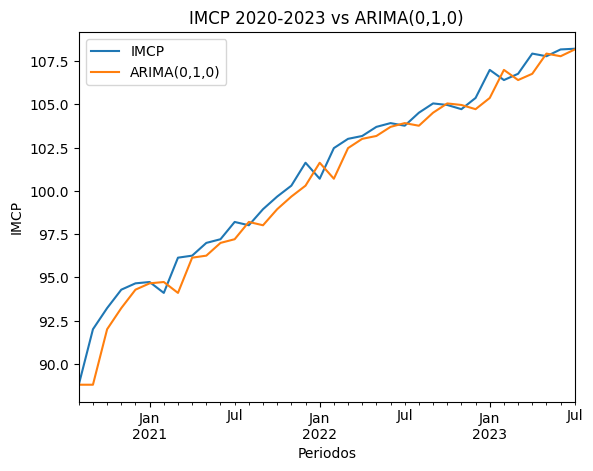

In [1019]:
data_3['IMCP'].plot(label = 'IMCP')
data_3['arima'].plot(label = 'ARIMA(0,1,0)')
plt.title('IMCP 2020-2023 vs ARIMA(0,1,0)')
plt.ylabel('IMCP')
plt.legend()
plt.show()

In [1020]:
prediccion1 = results.predict(start = '2023-08-01', end = '2023-10-01')
prediccion1

2023-08-01    108.209387
2023-09-01    108.209387
2023-10-01    108.209387
Freq: MS, Name: predicted_mean, dtype: float64

In [1021]:
data_3['IMCP'].tail()

Periodos
2023-03-01    106.762443
2023-04-01    107.928291
2023-05-01    107.775653
2023-06-01    108.168118
2023-07-01    108.209387
Freq: MS, Name: IMCP, dtype: float64

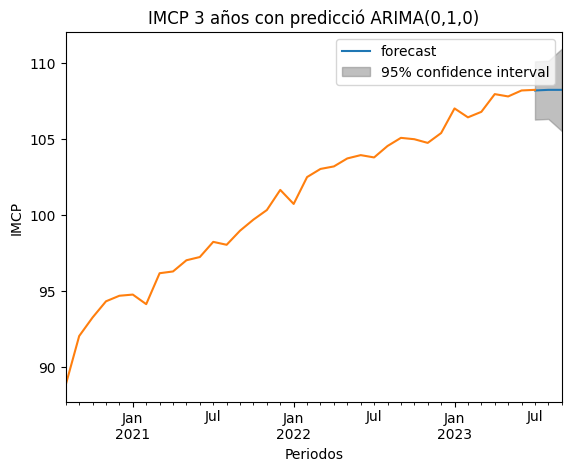

In [1022]:
plot_predict(results,start = '2023-07-01', end = '2023-09-01')
data_3['IMCP'].plot()
plt.title('IMCP 3 años con predicció ARIMA(0,1,0)')
plt.ylabel('IMCP')
plt.show()

In [1023]:
forecast = results.get_forecast(steps = 6)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()
inicio = '2023-08-01'
fin = '2023-10-01'
pronostico_valor = forecast_mean[inicio:fin]
pronostico_intervalos = forecast_ci.loc[inicio:fin]
df_pronostico = pd.DataFrame({
    'pronostico' : pronostico_valor,
    'límite inferior': pronostico_intervalos['lower IMCP'],
    'límite superior' : pronostico_intervalos['upper IMCP']
})

print(f"Pronostico para agosto 2023: {df_pronostico.iloc[0,0].round(2)}\nIntervalos de confianza {df_pronostico.iloc[0,1].round(2)} y {df_pronostico.iloc[0,2].round(2)}")

Pronostico para agosto 2023: 108.21
Intervalos de confianza 106.3 y 110.12


El pronóstico de ARIMA(0,1,0) para agosto de 2023 no termina de ser mas que el resultado ya obtenido para julio 2023, por lo que existe la posibilidad que se necesiten de una mayor cantidad de datos (los últimos 3 años son solo 36 datos) para poder hacer un mejor pronóstico.

## Haciendo entonces para 10 años

In [1024]:
data_20.dtypes

IMCP    float64
dtype: object

In [1025]:
data_20.isnull().sum()

IMCP    0
dtype: int64

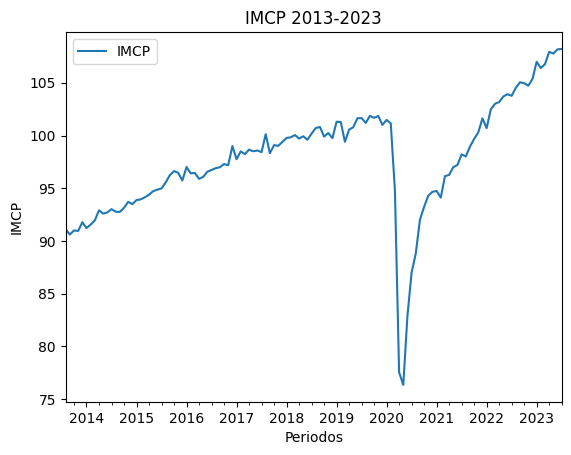

In [1026]:
data_20 = data_20[7:]
data_20.plot()
plt.title('IMCP 2013-2023')
plt.ylabel('IMCP')
plt.show()

In [1027]:
## prueba de raíz unitaria
prueba_adf = adfuller(data_20['IMCP'])
pvalue = prueba_adf[1]
pvalue.round(2)

0.28

No se rechaza H0, no es una serie estacionaria.  Se procede a obtener las 1ras diferencias

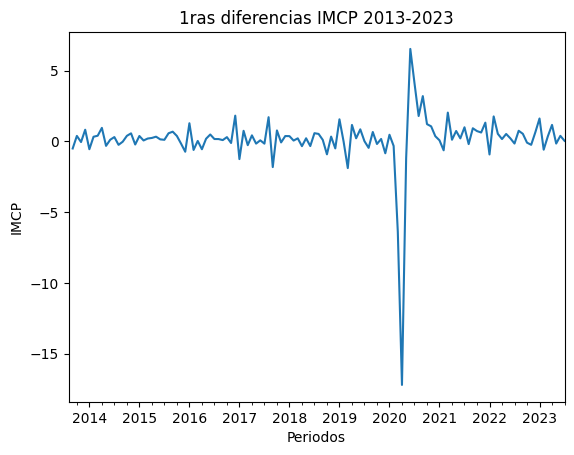

In [1028]:
data_20['1ra_diff'] = data_20['IMCP'].diff()
data_20['1ra_diff'].plot()
plt.title('1ras diferencias IMCP 2013-2023')
plt.ylabel('IMCP')
plt.show()

In [1029]:
prueba_adf1 = adfuller(data_20['1ra_diff'].dropna())
pvalue = prueba_adf1[1]
pvalue.round(2)

0.0

Se rechaza H0, las primeras diferencias es una serie estacionaria.

* IMCP 2003-2023 (julio a julio) integrado I(1)
* 1ras diferencias integrado I(0)

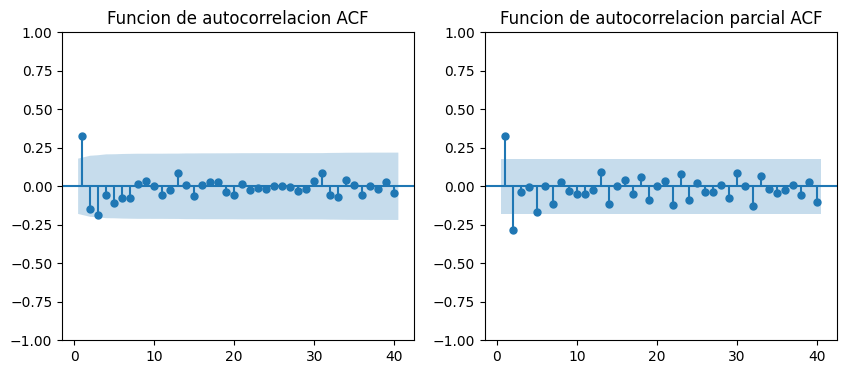

In [1030]:
## correlaciones
ig, ax = plt.subplots(1,2, figsize = (10,4))
##1er subgráfica
plot_acf(data_20['1ra_diff'].dropna(), zero = False,lags=40, ax= ax[0], title = 'Funcion de autocorrelacion ACF')
##2da gráfica
plot_pacf(data_20['1ra_diff'].dropna(), zero=False, lags=40, ax=ax[1], title = 'Funcion de autocorrelacion parcial ACF')
plt.show();

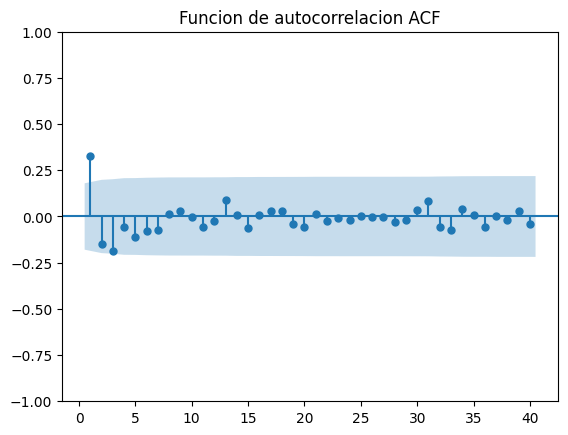

In [1031]:
plot_acf(data_20['1ra_diff'].dropna(), zero = False,lags=40, title = 'Funcion de autocorrelacion ACF')
plt.show()

No se observa un patrón repetitivo.  No es estacional.

In [1032]:
# obtener el orden, aic
pm.auto_arima(data_20['IMCP'],
              start_p = 1, start_q = 1,
              max_p = 20, max_q = 20,
              ic = 'aic',
              seasonal = False)

ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [1033]:
# obtener el orden, bic
pm.auto_arima(data_20['IMCP'],
              start_p = 1, start_q = 1,
              max_p = 20, max_q = 20,
              ic = 'bic',
              seasonal = False)

ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [1034]:
# obtener el orden, hqic
pm.auto_arima(data_20['IMCP'],
              start_p = 1, start_q = 1,
              max_p = 20, max_q = 20,
              ic = 'hqic',
              seasonal = False)

ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [1035]:
# obtener el orden, oob
pm.auto_arima(data_20['IMCP'],
              start_p = 1, start_q = 1,
              max_p = 20, max_q = 20,
              ic = 'oob',
              seasonal = False)

ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [1036]:
# vamos a estimar varios modelos y  guardar el AIC BIC
ic = {}
for ar in range(7):
    for ma in range(7):
        print(f"AR: {ar}, MA: {ma}")
        modelo = ARIMA(data_20['1ra_diff'], order=(ar, 0, ma))
        resultado = modelo.fit()
        ic[(ar, ma)] = [resultado.aic, resultado.bic]
 
ic = pd.DataFrame(ic, index=["AIC", "BIC"]).T
ic.index = ic.index.set_names(["AR", "MA"])

AR: 0, MA: 0
AR: 0, MA: 1
AR: 0, MA: 2
AR: 0, MA: 3
AR: 0, MA: 4
AR: 0, MA: 5
AR: 0, MA: 6
AR: 1, MA: 0
AR: 1, MA: 1
AR: 1, MA: 2
AR: 1, MA: 3
AR: 1, MA: 4
AR: 1, MA: 5
AR: 1, MA: 6
AR: 2, MA: 0
AR: 2, MA: 1
AR: 2, MA: 2
AR: 2, MA: 3
AR: 2, MA: 4
AR: 2, MA: 5
AR: 2, MA: 6
AR: 3, MA: 0
AR: 3, MA: 1
AR: 3, MA: 2
AR: 3, MA: 3
AR: 3, MA: 4
AR: 3, MA: 5
AR: 3, MA: 6
AR: 4, MA: 0
AR: 4, MA: 1
AR: 4, MA: 2
AR: 4, MA: 3
AR: 4, MA: 4
AR: 4, MA: 5
AR: 4, MA: 6
AR: 5, MA: 0
AR: 5, MA: 1
AR: 5, MA: 2
AR: 5, MA: 3
AR: 5, MA: 4
AR: 5, MA: 5
AR: 5, MA: 6
AR: 6, MA: 0
AR: 6, MA: 1
AR: 6, MA: 2
AR: 6, MA: 3
AR: 6, MA: 4
AR: 6, MA: 5
AR: 6, MA: 6


In [1037]:
ic.sort_values('AIC').head(1)

,,AIC,BIC
AR,MA,,
3,4,481.120995,506.208421


In [1038]:
ic.sort_values('BIC').head(1)

,,AIC,BIC
AR,MA,,
0,1,486.510384,494.87286


In [1039]:
ic

AIC         BIC
AR MA                        
0  0   504.017242  509.592226
   1   486.510384  494.872860
   2   488.502760  499.652727
   3   483.824668  497.762127
   4   485.727478  502.452429
   5   485.285111  504.797553
   6   487.200403  509.500337
1  0   492.434216  500.796691
   1   488.507143  499.657109
   2   483.694365  497.631824
   3   485.108207  501.833157
   4   483.885119  503.397561
   5   485.558242  507.858176
   6   486.706462  511.793888
2  0   484.409686  495.559653
   1   486.169602  500.107061
   2   484.934782  501.659733
   3   482.962797  502.475239
   4   484.392944  506.692878
   5   486.383082  511.470508
   6   487.946930  515.821848
3  0   486.231078  500.168537
   1   487.001127  503.726077
   2   488.309185  507.821628
   3   484.287775  506.587709
   4   481.120995  506.208421
   5   484.981632  512.856549
   6   483.418892  514.081301
4  0   488.222626  504.947577
   1   488.818897  508.331339
   2   486.697099  508.997033
   3   481.715553  506.802979
   4   482.967167  510.842085
   5   490.475245  521.137654
   6   491.014690  524.464591
5  0   486.890876  506.403318
   1   488.682354  510.982287
   2   489.304366  514.391792
   3   482.492301  510.367219
   4   484.508765  515.171174
   5   487.058742  520.508643
   6   487.916361  524.153753
6  0   488.890857  511.190791
   1   490.443017  515.530443
   2   488.893159  516.768076
   3   484.346063  515.008472
   4   486.560828  520.010728
   5   487.704587  523.941980
   6   489.893090  528.917974

Dado que auto_arima menciona el modelo (0,1,1) no coincide con el ciclo en el método 'AIC' (AR(3), MA(4)), aunque sí con lo del método 'BIC', se elegirá ese ARIMA, (0,1,1).

In [1040]:
model = ARIMA(data_20['IMCP'], order = (0,1,1))
results = model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                   IMCP   No. Observations:                  120
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -240.430
Date:                Mon, 30 Oct 2023   AIC                            484.859
Time:                        22:04:06   BIC                            490.417
Sample:                    08-01-2013   HQIC                           487.116
                         - 07-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.4199      0.041     10.261      0.000       0.340       0.500
sigma2         3.3245      0.141     23.652      0.000       3.049       3.600
Ljung-Box (L1) (Q):                   0.00   Jarque-

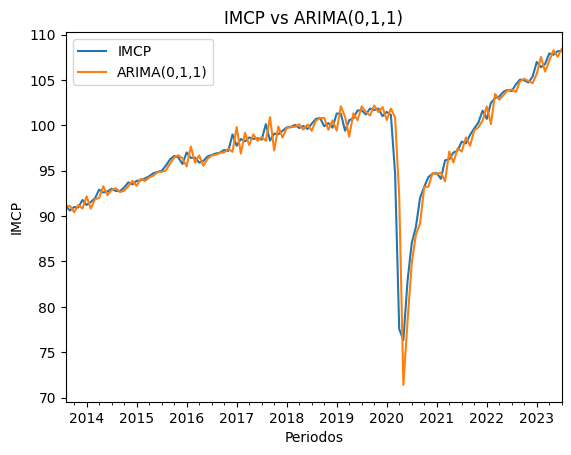

In [1041]:
data_20['arima'] = results.predict()
# asignamos el valor inicial al del arima porque es 0
data_20['arima'][0] = data_20['IMCP'][0]

data_20['IMCP'].plot(label = 'IMCP')
data_20['arima'].plot(label = 'ARIMA(0,1,1)')
plt.title('IMCP vs ARIMA(0,1,1)')
plt.ylabel('IMCP')
plt.legend()
plt.show()

In [1042]:
prediccion4 = results.predict(start = '2023-08-01', end = '2023-10-01')
prediccion4

2023-08-01    108.120924
2023-09-01    108.120924
2023-10-01    108.120924
Freq: MS, Name: predicted_mean, dtype: float64

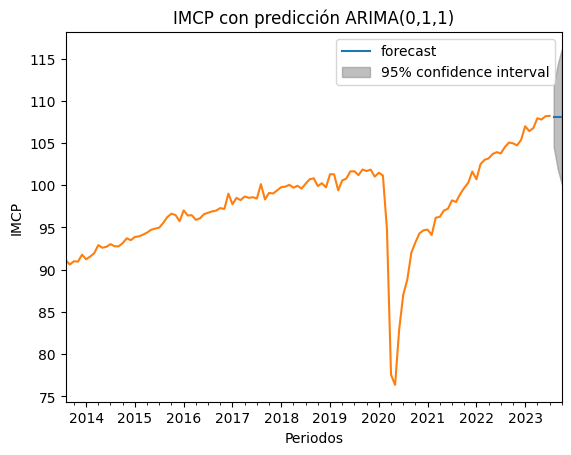

In [1043]:
plot_predict(results,start = '2023-08-01', end = '2023-10-01')
data_20['IMCP'].plot()
plt.title('IMCP con predicción ARIMA(0,1,1)')
plt.ylabel('IMCP')
plt.show()

In [1044]:
forecast = results.get_forecast(steps = 6)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()
inicio = '2023-08-01'
fin = '2023-10-01'
pronostico_valor = forecast_mean[inicio:fin]
pronostico_intervalos = forecast_ci.loc[inicio:fin]
df_pronostico = pd.DataFrame({
    'pronostico' : pronostico_valor,
    'límite inferior': pronostico_intervalos['lower IMCP'],
    'límite superior' : pronostico_intervalos['upper IMCP']
})

print(f"Pronostico para agosto 2023: {df_pronostico.iloc[0,0].round(2)}\nIntervalos de confianza {df_pronostico.iloc[0,1].round(2)} y {df_pronostico.iloc[0,2].round(2)}")

Pronostico para agosto 2023: 108.12
Intervalos de confianza 104.55 y 111.69
